In [29]:
import sklearn

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
data = load_breast_cancer()

In [32]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [33]:
import pandas as pd

df = pd.DataFrame(data['data'], columns=data['feature_names'])
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [34]:
df["target"] = data["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [35]:
x = df[data.feature_names].values
y = df['target'].values

In [36]:
from sklearn.linear_model import LogisticRegression
bebe = LogisticRegression(solver='liblinear')

In [37]:
bebe.fit(x,y)

LogisticRegression(solver='liblinear')

In [38]:
bebe.predict([x[500]])

array([1])

In [39]:
bebe.score(x,y)

# checking the predition

0.9595782073813708

In [40]:
from matplotlib import pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# importing libs and classes

In [41]:
digits = datasets.load_digits()
# print(digits['DESCR'])
# or
n_examples = len(digits.images)
n_examples

# importing dataset characteristics: pixels, image and values

1797

In [42]:
dataimg = digits.images.reshape(n_examples,-1)
print(dataimg)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [43]:
clf = svm.SVC(gamma=0.001)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    dataimg, digits.target, test_size=0.95, shuffle=True
)

In [45]:
clf.fit(X_train, y_train)

# training

SVC(gamma=0.001)

In [46]:
prediction = clf.predict(X_test)

print(
    f"Relatório de Classificação para o modelo {clf}:\n"
    f"{metrics.classification_report(y_test,prediction)}"
)


# Attention to precision and f1-score
# get the data > fit and predict

Relatório de Classificação para o modelo SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       172
           1       0.82      0.96      0.88       173
           2       0.91      0.88      0.90       167
           3       0.97      0.83      0.89       175
           4       0.94      0.96      0.95       170
           5       0.87      0.98      0.92       171
           6       0.96      0.98      0.97       174
           7       0.90      0.89      0.90       171
           8       0.90      0.74      0.81       165
           9       0.81      0.88      0.84       170

    accuracy                           0.90      1708
   macro avg       0.91      0.90      0.90      1708
weighted avg       0.91      0.90      0.90      1708



In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sklearn.metrics.ConfusionMatrixDisplay
# generating confusion_matrix

sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay

In [51]:

confusao = metrics.confusion_matrix(y_test, prediction)

In [52]:
# Display confusion Matrix
print(confusao)

[[159   0   0   0   2   1   5   0   0   5]
 [  0 166   4   0   0   0   0   0   0   3]
 [  0   5 147   0   0   0   0   1   5   9]
 [  0   1   0 145   0   7   0   4   7  11]
 [  0   4   0   0 164   1   0   1   0   0]
 [  0   0   0   1   0 167   1   0   0   2]
 [  0   1   0   0   0   1 171   0   1   0]
 [  0   5   1   0   4   3   0 152   0   6]
 [  0  19   9   1   2   8   1   3 122   0]
 [  0   2   0   3   3   4   0   7   1 150]]


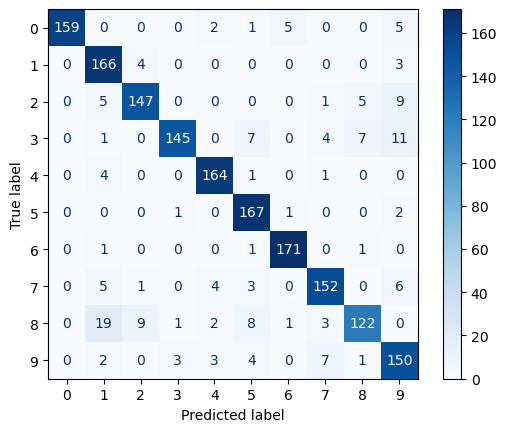

In [57]:
# Display confusion Matrix

disp = ConfusionMatrixDisplay(confusao, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()